In [1]:
import jax
import jax.numpy as jnp

import os, sys
sys.path.append(os.path.dirname(os.path.dirname(os.path.dirname(os.path.abspath("./")))))

from training import Agent
from loss import params, loss_fn, evaluate_fn
from data import generate_dataset, generate_batch_fn

import config
config.n_data = {
    "i": 100,
    "b": 100,
    "cx": 1001,
    "ct": 1001,
    "dx": 100,
    "dt": 602,
}
config.batch_size = {
    "dirichlet": (config.n_data["i"]+2*config.n_data["b"]+config.n_data["dx"]*config.n_data["dt"]) // 20,
    "collocation": (config.n_data["dx"]*config.n_data["dt"]+config.n_data["cx"]*config.n_data["ct"]) // 20,
}
config.iterations = 10000
config.print_every = 1000
config.lr = 1e-3
config.weights = {
	"c1": 1.0,
	"c2": 1.0,
	"d1": 5.0,
	"d2": 1.0,
	"l1": 1e-4,
	"l2": 1e-4,
}

datasets = generate_dataset(config.n_data["i"], config.n_data["b"], config.n_data["cx"], config.n_data["ct"], config.n_data["dx"], config.n_data["dt"])
batch_fn, evaluate_batch_fn = generate_batch_fn(config.key, config.batch_size, *datasets, config.weights)

agent = Agent(params, loss_fn, evaluate_fn, "models/{}".format(config.NAME))
agent.compile(config.optimizer, config.lr)
agent.train(config.iterations, batch_fn, evaluate_batch_fn, config.print_every, config.save_every, config.loss_names, config.log_file)

2020/09/09, 10:02:16, Iteration: 1000, Train Loss: 3.1390e+00, c1: 5.2197e-03, c2: 8.0355e-01, d1: 4.5935e-01, d2: 0.0000e+00, l1_reg: 2.9378e+02, l2_reg: 4.1204e+01
2020/09/09, 10:02:41, Iteration: 2000, Train Loss: 2.6489e+00, c1: 7.5462e-03, c2: 3.6737e-01, d1: 4.4813e-01, d2: 0.0000e+00, l1_reg: 2.9207e+02, l2_reg: 4.1299e+01
2020/09/09, 10:03:08, Iteration: 3000, Train Loss: 2.4405e+00, c1: 1.0484e-02, c2: 1.8947e-01, d1: 4.4143e-01, d2: 0.0000e+00, l1_reg: 2.9169e+02, l2_reg: 4.2261e+01
2020/09/09, 10:03:34, Iteration: 4000, Train Loss: 2.3146e+00, c1: 2.2310e-02, c2: 1.7437e-01, d1: 4.1681e-01, d2: 0.0000e+00, l1_reg: 2.9364e+02, l2_reg: 4.5331e+01
2020/09/09, 10:04:01, Iteration: 5000, Train Loss: 1.8758e+00, c1: 6.4569e-02, c2: 8.0252e-01, d1: 1.9437e-01, d2: 0.0000e+00, l1_reg: 3.1108e+02, l2_reg: 5.7360e+01
2020/09/09, 10:04:27, Iteration: 6000, Train Loss: 9.3485e-01, c1: 1.5484e-02, c2: 6.0623e-01, d1: 5.4694e-02, d2: 0.0000e+00, l1_reg: 3.2586e+02, l2_reg: 7.0795e+01
2020

/usr/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [4]:
config.iterations = 40000
agent.train(config.iterations, batch_fn, evaluate_batch_fn, config.print_every, config.save_every, config.loss_names, config.log_file)

2020/09/09, 10:07:58, Iteration: 11000, Train Loss: 4.9917e-01, c1: 1.6753e-02, c2: 3.0805e-01, d1: 2.6343e-02, d2: 0.0000e+00, l1_reg: 3.3781e+02, l2_reg: 8.8810e+01
2020/09/09, 10:08:24, Iteration: 12000, Train Loss: 4.8622e-01, c1: 1.2089e-02, c2: 3.1309e-01, d1: 2.3578e-02, d2: 0.0000e+00, l1_reg: 3.3974e+02, l2_reg: 9.1780e+01
2020/09/09, 10:08:50, Iteration: 13000, Train Loss: 3.7525e-01, c1: 1.1009e-02, c2: 2.1707e-01, d1: 2.0703e-02, d2: 0.0000e+00, l1_reg: 3.4149e+02, l2_reg: 9.5026e+01
2020/09/09, 10:09:17, Iteration: 14000, Train Loss: 3.2458e-01, c1: 1.2102e-02, c2: 1.7005e-01, d1: 1.9685e-02, d2: 0.0000e+00, l1_reg: 3.4246e+02, l2_reg: 9.7516e+01
2020/09/09, 10:09:43, Iteration: 15000, Train Loss: 3.2177e-01, c1: 1.2737e-02, c2: 1.6936e-01, d1: 1.9074e-02, d2: 0.0000e+00, l1_reg: 3.4332e+02, l2_reg: 9.9753e+01
2020/09/09, 10:10:10, Iteration: 16000, Train Loss: 2.7299e-01, c1: 1.1962e-02, c2: 1.2564e-01, d1: 1.8183e-02, d2: 0.0000e+00, l1_reg: 3.4338e+02, l2_reg: 1.0131e+0

/usr/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


2020/09/09, 10:12:22, Iteration: 21000, Train Loss: 1.7736e-01, c1: 1.2646e-02, c2: 5.0208e-02, d1: 1.4129e-02, d2: 0.0000e+00, l1_reg: 3.3761e+02, l2_reg: 1.0100e+02
2020/09/09, 10:12:48, Iteration: 22000, Train Loss: 1.5602e-01, c1: 5.8470e-03, c2: 3.7783e-02, d1: 1.3757e-02, d2: 0.0000e+00, l1_reg: 3.3576e+02, l2_reg: 1.0028e+02
2020/09/09, 10:13:14, Iteration: 23000, Train Loss: 1.7453e-01, c1: 1.4385e-02, c2: 4.5401e-02, d1: 1.4269e-02, d2: 0.0000e+00, l1_reg: 3.3400e+02, l2_reg: 9.9962e+01
2020/09/09, 10:13:41, Iteration: 24000, Train Loss: 1.5276e-01, c1: 1.0455e-02, c2: 3.2529e-02, d1: 1.3324e-02, d2: 0.0000e+00, l1_reg: 3.3186e+02, l2_reg: 9.9663e+01
2020/09/09, 10:14:07, Iteration: 25000, Train Loss: 1.4593e-01, c1: 5.9903e-03, c2: 3.0231e-02, d1: 1.3372e-02, d2: 0.0000e+00, l1_reg: 3.2931e+02, l2_reg: 9.9161e+01
2020/09/09, 10:14:33, Iteration: 26000, Train Loss: 1.5099e-01, c1: 7.6665e-03, c2: 3.0086e-02, d1: 1.4145e-02, d2: 0.0000e+00, l1_reg: 3.2649e+02, l2_reg: 9.8619e+0

In [7]:
config.weights = {
	"c1": 1e-1,
	"c2": 1e-1,
	"d1": 5e-1,
	"d2": 1e-1,
	"l1": 1e-5,
	"l2": 1e-5,
}

datasets = generate_dataset(config.n_data["i"], config.n_data["b"], config.n_data["cx"], config.n_data["ct"], config.n_data["dx"], config.n_data["dt"])
batch_fn, evaluate_batch_fn = generate_batch_fn(config.key, config.batch_size, *datasets, config.weights)

config.iterations = 50000
agent.train(config.iterations, batch_fn, evaluate_batch_fn, config.print_every, config.save_every, config.loss_names, config.log_file)

2020/09/09, 10:27:36, Iteration: 51000, Train Loss: 9.8852e-03, c1: 2.0331e-03, c2: 4.0134e-03, d1: 1.2581e-02, d2: 0.0000e+00, l1_reg: 2.2246e+02, l2_reg: 7.6542e+01
2020/09/09, 10:28:02, Iteration: 52000, Train Loss: 9.8150e-03, c1: 1.9002e-03, c2: 3.7720e-03, d1: 1.2547e-02, d2: 0.0000e+00, l1_reg: 2.2137e+02, l2_reg: 7.6051e+01
2020/09/09, 10:28:27, Iteration: 53000, Train Loss: 1.0223e-02, c1: 1.9037e-03, c2: 7.6183e-03, d1: 1.2633e-02, d2: 0.0000e+00, l1_reg: 2.1994e+02, l2_reg: 7.5541e+01
2020/09/09, 10:28:54, Iteration: 54000, Train Loss: 1.0395e-02, c1: 3.8087e-03, c2: 7.8874e-03, d1: 1.2586e-02, d2: 0.0000e+00, l1_reg: 2.1802e+02, l2_reg: 7.5173e+01
2020/09/09, 10:29:20, Iteration: 55000, Train Loss: 1.0603e-02, c1: 2.3708e-03, c2: 1.1634e-02, d1: 1.2596e-02, d2: 0.0000e+00, l1_reg: 2.1568e+02, l2_reg: 7.4739e+01
2020/09/09, 10:29:47, Iteration: 56000, Train Loss: 1.0870e-02, c1: 5.6451e-03, c2: 9.6599e-03, d1: 1.2938e-02, d2: 0.0000e+00, l1_reg: 2.1277e+02, l2_reg: 7.4227e+0

/usr/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


2020/09/09, 10:31:59, Iteration: 61000, Train Loss: 1.0809e-02, c1: 4.5512e-03, c2: 1.3564e-02, d1: 1.2609e-02, d2: 0.0000e+00, l1_reg: 1.9762e+02, l2_reg: 7.1629e+01
2020/09/09, 10:32:25, Iteration: 62000, Train Loss: 1.0398e-02, c1: 5.0950e-03, c2: 9.1822e-03, d1: 1.2629e-02, d2: 0.0000e+00, l1_reg: 1.9450e+02, l2_reg: 7.1085e+01
2020/09/09, 10:32:51, Iteration: 63000, Train Loss: 1.0969e-02, c1: 3.7176e-03, c2: 1.4738e-02, d1: 1.3012e-02, d2: 0.0000e+00, l1_reg: 1.9127e+02, l2_reg: 7.0478e+01
2020/09/09, 10:33:18, Iteration: 64000, Train Loss: 1.0076e-02, c1: 3.5862e-03, c2: 8.2971e-03, d1: 1.2607e-02, d2: 0.0000e+00, l1_reg: 1.8843e+02, l2_reg: 7.0000e+01
2020/09/09, 10:33:44, Iteration: 65000, Train Loss: 1.0312e-02, c1: 4.4785e-03, c2: 9.3265e-03, d1: 1.2763e-02, d2: 0.0000e+00, l1_reg: 1.8551e+02, l2_reg: 6.9479e+01
2020/09/09, 10:34:10, Iteration: 66000, Train Loss: 1.1050e-02, c1: 4.2626e-03, c2: 1.4978e-02, d1: 1.3220e-02, d2: 0.0000e+00, l1_reg: 1.8259e+02, l2_reg: 6.8996e+0

In [9]:
config.weights = {
	"c1": 1e-1,
	"c2": 5e-1,
	"d1": 5e-1,
	"d2": 1e-1,
	"l1": 1e-5,
	"l2": 1e-5,
}

datasets = generate_dataset(config.n_data["i"], config.n_data["b"], config.n_data["cx"], config.n_data["ct"], config.n_data["dx"], config.n_data["dt"])
batch_fn, evaluate_batch_fn = generate_batch_fn(config.key, config.batch_size, *datasets, config.weights)

config.iterations = 50000
agent.train(config.iterations, batch_fn, evaluate_batch_fn, config.print_every, config.save_every, config.loss_names, config.log_file)

2020/09/09, 10:55:31, Iteration: 101000, Train Loss: 1.4347e-02, c1: 4.1542e-03, c2: 1.1034e-02, d1: 1.2972e-02, d2: 0.0000e+00, l1_reg: 1.3196e+02, l2_reg: 6.0869e+01
2020/09/09, 10:55:56, Iteration: 102000, Train Loss: 1.3397e-02, c1: 2.7449e-03, c2: 9.4973e-03, d1: 1.2878e-02, d2: 0.0000e+00, l1_reg: 1.3209e+02, l2_reg: 6.1342e+01
2020/09/09, 10:56:22, Iteration: 103000, Train Loss: 1.1323e-02, c1: 3.3326e-03, c2: 5.2893e-03, d1: 1.2804e-02, d2: 0.0000e+00, l1_reg: 1.3262e+02, l2_reg: 6.1672e+01
2020/09/09, 10:56:48, Iteration: 104000, Train Loss: 1.4254e-02, c1: 5.0981e-03, c2: 1.0766e-02, d1: 1.2829e-02, d2: 0.0000e+00, l1_reg: 1.3269e+02, l2_reg: 6.1971e+01
2020/09/09, 10:57:14, Iteration: 105000, Train Loss: 1.3806e-02, c1: 3.1828e-03, c2: 1.0236e-02, d1: 1.2846e-02, d2: 0.0000e+00, l1_reg: 1.3247e+02, l2_reg: 6.2231e+01
2020/09/09, 10:57:41, Iteration: 106000, Train Loss: 1.2493e-02, c1: 3.7417e-03, c2: 7.5276e-03, d1: 1.2806e-02, d2: 0.0000e+00, l1_reg: 1.3276e+02, l2_reg: 6.2

/usr/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


2020/09/09, 10:59:53, Iteration: 111000, Train Loss: 1.2088e-02, c1: 3.5086e-03, c2: 6.8041e-03, d1: 1.2761e-02, d2: 0.0000e+00, l1_reg: 1.3199e+02, l2_reg: 6.3488e+01
2020/09/09, 11:00:20, Iteration: 112000, Train Loss: 1.3564e-02, c1: 3.4118e-03, c2: 9.7360e-03, d1: 1.2801e-02, d2: 0.0000e+00, l1_reg: 1.3181e+02, l2_reg: 6.3630e+01
2020/09/09, 11:00:46, Iteration: 113000, Train Loss: 1.2425e-02, c1: 2.8678e-03, c2: 7.6548e-03, d1: 1.2711e-02, d2: 0.0000e+00, l1_reg: 1.3176e+02, l2_reg: 6.3788e+01
2020/09/09, 11:01:12, Iteration: 114000, Train Loss: 1.2500e-02, c1: 2.7251e-03, c2: 7.7239e-03, d1: 1.2790e-02, d2: 0.0000e+00, l1_reg: 1.3313e+02, l2_reg: 6.3969e+01
2020/09/09, 11:01:39, Iteration: 115000, Train Loss: 1.3577e-02, c1: 3.6673e-03, c2: 9.6958e-03, d1: 1.2813e-02, d2: 0.0000e+00, l1_reg: 1.3143e+02, l2_reg: 6.4116e+01
2020/09/09, 11:02:05, Iteration: 116000, Train Loss: 1.1329e-02, c1: 2.8335e-03, c2: 5.3735e-03, d1: 1.2810e-02, d2: 0.0000e+00, l1_reg: 1.3113e+02, l2_reg: 6.4

<IPython.core.display.Javascript object>


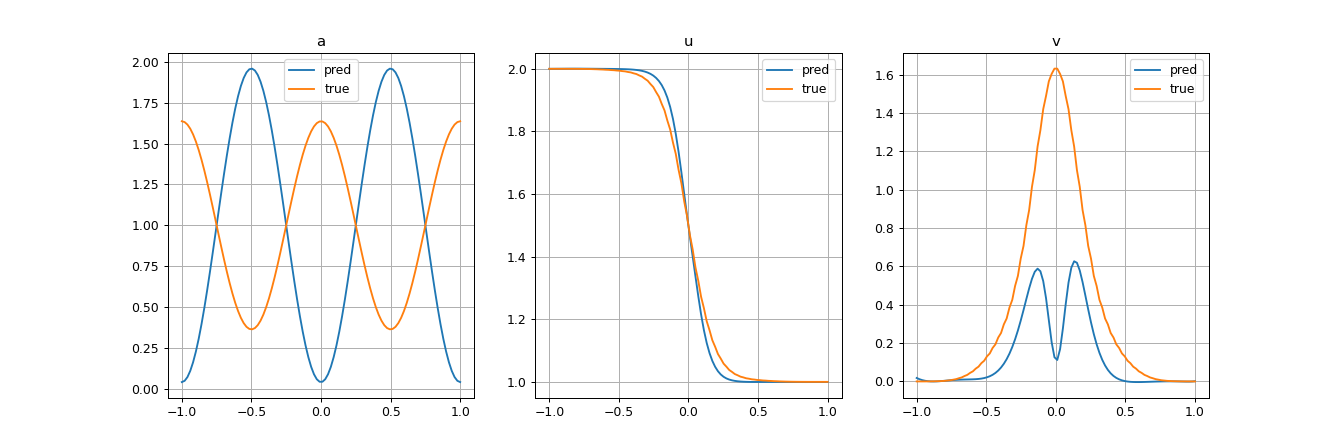

In [10]:
from loss import inverse_model, direct_model
from data import domain
import jax.numpy as jnp
import numpy as np

inverse_params = agent.params[1]
x_test = jnp.linspace(*domain[:, 0], 100).reshape((-1, 1))
a_fn = lambda x: 1+2/np.pi*np.cos(2*np.pi*x)
a_pred = inverse_model(inverse_params, x_test)
a_true = a_fn(x_test)

direct_params = agent.params[0]
t_test = domain[1, 1]*jnp.ones_like(x_test)
uv_pred = direct_model(direct_params, jnp.hstack([x_test, t_test]))

from scipy.io import loadmat
data_true = loadmat("problem2_2_snapshot_epsilon_1e-12.mat")
u_true, v_true = data_true["u_snapshots"][:, -1], data_true["v_snapshots"][:, -1]

import matplotlib.pyplot as plt
%matplotlib notebook

f, ax = plt.subplots(1, 3, figsize = (15, 5))
ax[0].plot(x_test, a_pred, label = "pred")
ax[0].plot(x_test, a_true, label = "true")
ax[0].set_title("a")
ax[1].plot(x_test, uv_pred[:, 0:1], label = "pred")
ax[1].plot(x_test, u_true, label = "true")
ax[1].set_title("u")
ax[2].plot(x_test, uv_pred[:, 1:2], label = "pred")
ax[2].plot(x_test, v_true, label = "true")
ax[2].set_title("v")
for ax_ in ax:
	ax_.legend()
	ax_.grid()
plt.show()

In [6]:
agent.params[1]

DeviceArray([-3.004625], dtype=float32)

In [12]:
type(agent.params[1].shape)

tuple